# Visualization of a Simple Stochastic Gradient Descent (eager execution)

Here we visualize the minimization of the loss with the SGD algorithm in its variants vanilla SGD, batch SGD and minibatch SGD. For this we consider a linear model with only two weights (the slope and the offset).

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.enable_eager_execution()

In [3]:
tf.VERSION

'1.13.1'

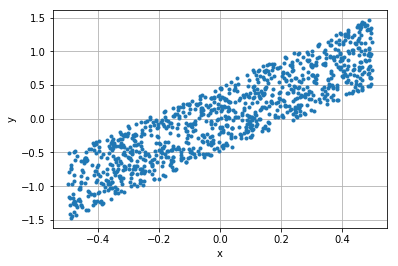

In [4]:
# Create a linear function with noise as our data
nsamples = 1000
ref_slope = 2.0
ref_offset = 0.0
noise = np.random.random((nsamples, 1)) - 0.5    # -0.5 to center the noise
x_train = np.random.random((nsamples, 1)) - 0.5  # -0.5 to center x around 0
y_train = ref_slope * x_train + ref_offset + noise

plt.plot(x_train, y_train, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train.astype(np.float32),
                                              y_train.astype(np.float32)))
dataset = dataset.batch(1000)
dataset = dataset.repeat(100)

In [6]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [7]:
history = []
slope = tf.Variable(np.random.randn(), name='slope')
offset = tf.Variable(np.random.randn(), name='offset')

for xtr, ytr in dataset:
    with tf.GradientTape() as tape:
        yhat = slope * xtr + offset
        loss = tf.losses.mean_squared_error(yhat, ytr)
        
        grads = tape.gradient(loss, [slope, offset])
        opt.apply_gradients(zip(grads, [slope, offset]),
                            global_step=tf.train.get_or_create_global_step())
    
    history.append([slope.numpy(), offset.numpy(), loss.numpy()])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


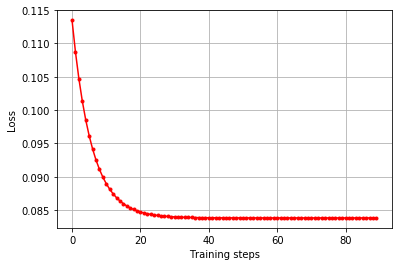

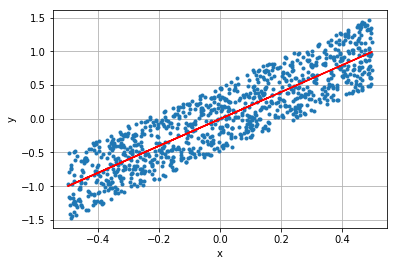

In [8]:
slope_hist = np.array(history)[:, 0]
offset_hist = np.array(history)[:, 1]
loss_hist = np.array(history)[:, 2]

plt.plot(loss_hist[10:], 'r.-')
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.plot(x_train, y_train, '.')
plt.plot(x_train, slope_hist[-1] * x_train + offset_hist[-1], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

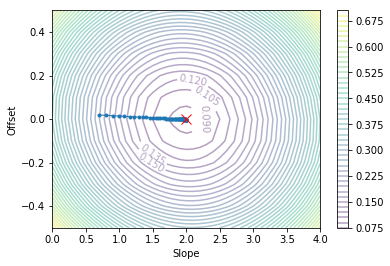

In [9]:
def loss_function_field(m, n, xref, yref):
    return np.mean(np.square(yref - m * xref - n ))

_m = np.arange(-0, 4.01, 0.1)
_n = np.arange(-0.5, 0.51, 0.1)
M, N = np.meshgrid(_m, _n)

Z = np.zeros(M.shape)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        Z[i, j] = loss_function_field(M[i, j], N[i, j],
                                      x_train, y_train)
        
#matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

cp = plt.contour(M, N, Z, 50, vmin=Z.min(), vmax=Z.max(), alpha=0.4)
plt.clabel(cp, cp.levels[:6])
plt.colorbar()
m = slope_hist[-1]
n = offset_hist[-1]
plt.plot(slope_hist, offset_hist, '.-', lw=1)
plt.plot([ref_slope], [ref_offset], 'rx', ms=10)
plt.xlim([_m.min(), _m.max()])
plt.ylim([_n.min(), _n.max()])
plt.xlabel('Slope')
plt.ylabel('Offset')
plt.show()

#matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)